In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path1 =  'C://Users//HP//Downloads//Excel Dashboards//C5 Input for participants//C5 Input for participants//domestic_visitors'

# create one empty data frame to adding the data

domestic_visitors = pd.DataFrame()

# Iterate multiple files in the folder

for file1 in os.listdir(path1):
    if file1.endswith('.csv'):
        join_file_path = os.path.join(path1,file1)
        data = pd.read_csv(join_file_path)
        domestic_visitors = pd.concat([domestic_visitors,data],ignore_index = True)
        
# save the file

final_file = 'domestic_visitors.csv'
domestic_visitors.to_csv(final_file,index = False , encoding = 'utf-8')
print(domestic_visitors.head())
print(domestic_visitors.shape)

   district        date     month  year visitors
0  Adilabad  01-01-2016   January  2016   792136
1  Adilabad  01-02-2016  February  2016   937820
2  Adilabad  01-03-2016     March  2016   582946
3  Adilabad  01-04-2016     April  2016   341948
4  Adilabad  01-05-2016       May  2016   252887
(1512, 5)


In [3]:
domestic_visitors.shape

(1512, 5)

In [4]:
path2 =  'C://Users//HP//Downloads//Excel Dashboards//C5 Input for participants//C5 Input for participants//foreign_visitors'

# create one empty data frame to adding the data

foreign_visitors = pd.DataFrame()

# Iterate multiple files in the folder

for file2 in os.listdir(path2):
    if file2.endswith('.csv'):
        join_file_path = os.path.join(path2,file2)
        data = pd.read_csv(join_file_path)
        foreign_visitors = pd.concat([foreign_visitors,data],ignore_index = True)
        
# save the file

final_file = 'foreign_visitors.csv'
foreign_visitors.to_csv(final_file,index = False , encoding = 'utf-8')
print(foreign_visitors.head())
print(foreign_visitors.shape)

   district        date     month  year visitors
0  Adilabad  01-01-2016   January  2016        2
1  Adilabad  01-02-2016  February  2016        0
2  Adilabad  01-03-2016     March  2016        2
3  Adilabad  01-04-2016     April  2016        0
4  Adilabad  01-05-2016       May  2016        0
(1512, 5)


In [5]:
foreign_visitors.shape

(1512, 5)

In [6]:
#handle null values
domestic_visitors['visitors'].isna().sum()

30

In [7]:
domestic_visitors[domestic_visitors['visitors'] == ' ']

,district,date,month,year,visitors
12,Bhadradri Kothagudem,01-01-2016,January,2016,
13,Bhadradri Kothagudem,01-02-2016,February,2016,
14,Bhadradri Kothagudem,01-03-2016,March,2016,
15,Bhadradri Kothagudem,01-04-2016,April,2016,
16,Bhadradri Kothagudem,01-05-2016,May,2016,
...,...,...,...,...,...
1459,Vikarabad,01-08-2019,August,2019,
1460,Vikarabad,01-09-2019,September,2019,
1461,Vikarabad,01-10-2019,October,2019,
1462,Vikarabad,01-11-2019,November,2019,


In [8]:
# Replace spaces with 0 in the 'visitors' column
domestic_visitors['visitors'] = pd.to_numeric(domestic_visitors['visitors'], errors='coerce').fillna(0).astype(int)

In [9]:
domestic_visitors[domestic_visitors['visitors'] == ' ']

,district,date,month,year,visitors


In [10]:
domestic_visitors[domestic_visitors['visitors'] == 0]

,district,date,month,year,visitors
12,Bhadradri Kothagudem,01-01-2016,January,2016,0
13,Bhadradri Kothagudem,01-02-2016,February,2016,0
14,Bhadradri Kothagudem,01-03-2016,March,2016,0
15,Bhadradri Kothagudem,01-04-2016,April,2016,0
16,Bhadradri Kothagudem,01-05-2016,May,2016,0
...,...,...,...,...,...
1459,Vikarabad,01-08-2019,August,2019,0
1460,Vikarabad,01-09-2019,September,2019,0
1461,Vikarabad,01-10-2019,October,2019,0
1462,Vikarabad,01-11-2019,November,2019,0


In [11]:
domestic_visitors['district'].str.strip()

0              Adilabad
1              Adilabad
2              Adilabad
3              Adilabad
4              Adilabad
             ...       
1507    Yadadri Bhongir
1508    Yadadri Bhongir
1509    Yadadri Bhongir
1510    Yadadri Bhongir
1511    Yadadri Bhongir
Name: district, Length: 1512, dtype: object

In [12]:
domestic_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 53.3+ KB


In [13]:
# convert the date column into datetime columns
domestic_visitors['date'] = pd.to_datetime(domestic_visitors['date'])
domestic_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  1512 non-null   object        
 1   date      1512 non-null   datetime64[ns]
 2   month     1512 non-null   object        
 3   year      1512 non-null   int64         
 4   visitors  1512 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 53.3+ KB


In [14]:
# foreign_visitors
foreign_visitors

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,0
1508,Yadadri Bhongir,01-09-2019,September,2019,0
1509,Yadadri Bhongir,01-10-2019,October,2019,0
1510,Yadadri Bhongir,01-11-2019,November,2019,0


In [15]:
foreign_visitors.isna().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [16]:
foreign_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [17]:
foreign_visitors[foreign_visitors['visitors'] == ' ']

,district,date,month,year,visitors
12,Bhadradri Kothagudem,01-01-2016,January,2016,
13,Bhadradri Kothagudem,01-02-2016,February,2016,
14,Bhadradri Kothagudem,01-03-2016,March,2016,
15,Bhadradri Kothagudem,01-04-2016,April,2016,
16,Bhadradri Kothagudem,01-05-2016,May,2016,
...,...,...,...,...,...
1459,Vikarabad,01-08-2019,August,2019,
1460,Vikarabad,01-09-2019,September,2019,
1461,Vikarabad,01-10-2019,October,2019,
1462,Vikarabad,01-11-2019,November,2019,


In [18]:
# Replace spaces with 0 in the 'visitors' column
foreign_visitors['visitors'] = pd.to_numeric(foreign_visitors['visitors'], errors='coerce').fillna(0).astype(int)

In [19]:
foreign_visitors[foreign_visitors['visitors'] == 'NaN']

,district,date,month,year,visitors


In [20]:
foreign_visitors['district'].str.strip()

0              Adilabad
1              Adilabad
2              Adilabad
3              Adilabad
4              Adilabad
             ...       
1507    Yadadri Bhongir
1508    Yadadri Bhongir
1509    Yadadri Bhongir
1510    Yadadri Bhongir
1511    Yadadri Bhongir
Name: district, Length: 1512, dtype: object

In [21]:
foreign_visitors['date'] = pd.to_datetime(foreign_visitors['date'])
foreign_visitors

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,0
1508,Yadadri Bhongir,2019-01-09,September,2019,0
1509,Yadadri Bhongir,2019-01-10,October,2019,0
1510,Yadadri Bhongir,2019-01-11,November,2019,0


In [22]:

foreign_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   district  1512 non-null   object        
 1   date      1512 non-null   datetime64[ns]
 2   month     1512 non-null   object        
 3   year      1512 non-null   int64         
 4   visitors  1512 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 53.3+ KB


# Questions

#  1 . List down the top 10 districts that have the highest number of domestic visitors overall (2016 - 2019)?

In [23]:
domestic_visitors

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-01-02,February,2016,937820
2,Adilabad,2016-01-03,March,2016,582946
3,Adilabad,2016-01-04,April,2016,341948
4,Adilabad,2016-01-05,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,389010
1508,Yadadri Bhongir,2019-01-09,September,2019,366862
1509,Yadadri Bhongir,2019-01-10,October,2019,381860
1510,Yadadri Bhongir,2019-01-11,November,2019,365990


In [24]:
Top_10_domestic = domestic_visitors.groupby(['district'])['visitors'].sum().sort_values(ascending = False).reset_index().head(10)
Top_10_domestic

,district,visitors
0,Hyderabad,83900960
1,Rajanna Sircilla,41763276
2,Warangal (Urban),30726603
3,Yadadri Bhongir,26893080
4,Bhadradri Kothagudem,21600962
5,Medak,20542639
6,Jayashankar Bhoopalpally,19632865
7,Mahbubnagar,17180118
8,Nirmal,13315796
9,Jagtial,11303514


#visualization

Text(0.5, 1.0, 'Top 10 District')

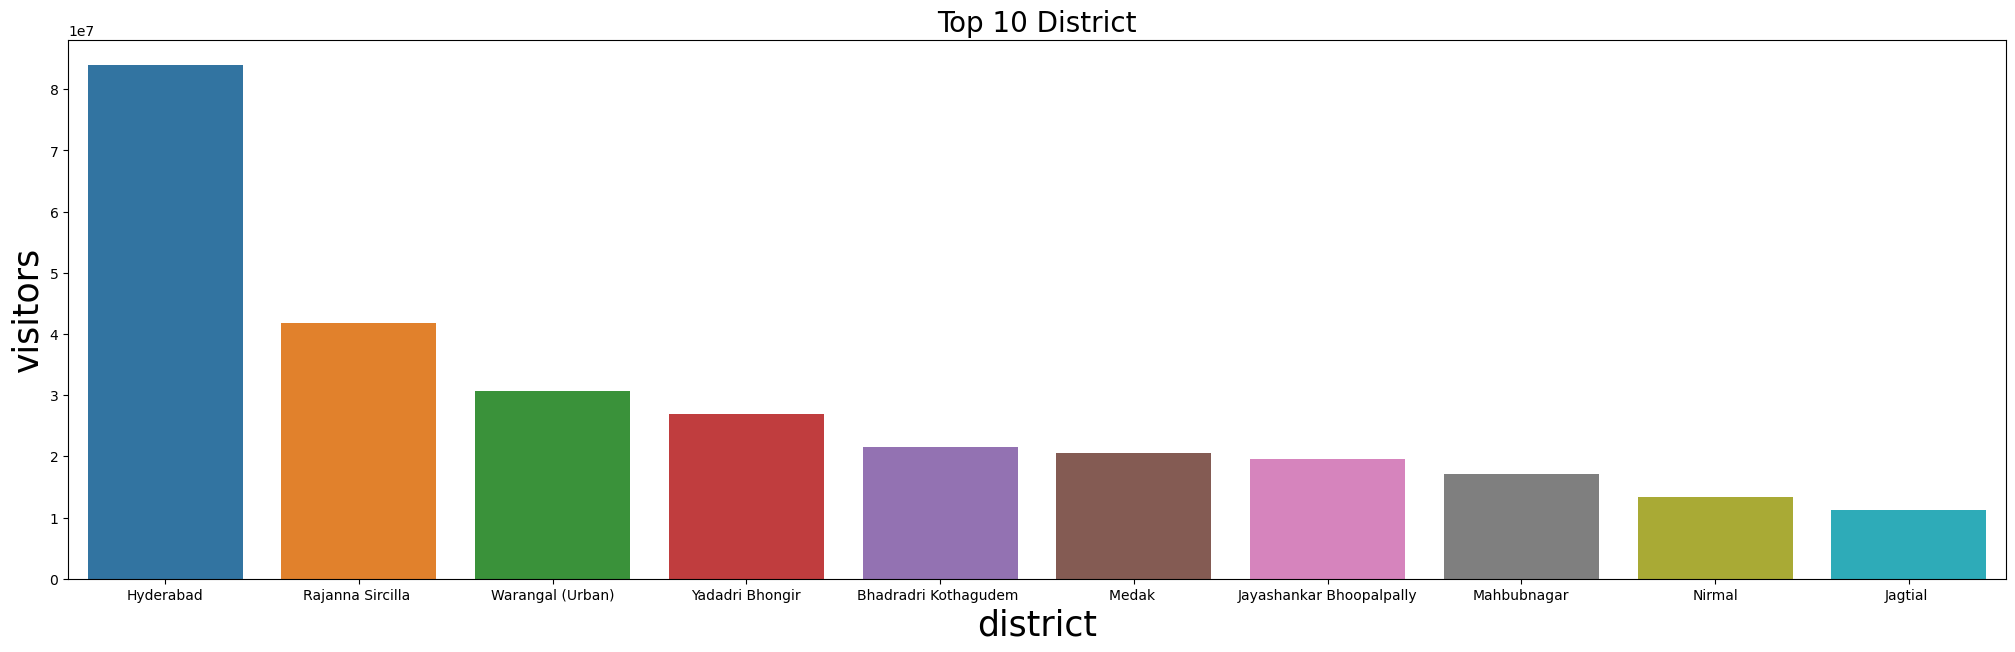

In [25]:
plt.figure(figsize = (25,7))
plt.xlabel('District',fontsize = 25)
plt.ylabel('Visitors',fontsize = 25)
barplot = sns.barplot(x = 'district' , y = 'visitors' , data = Top_10_domestic)
plt.title('Top 10 District',fontsize = 20)

In [26]:
top_10_millions = Top_10_domestic['visitors'].values/10000000
top_10_millions 

array([8.390096 , 4.1763276, 3.0726603, 2.689308 , 2.1600962, 2.0542639,
       1.9632865, 1.7180118, 1.3315796, 1.1303514])

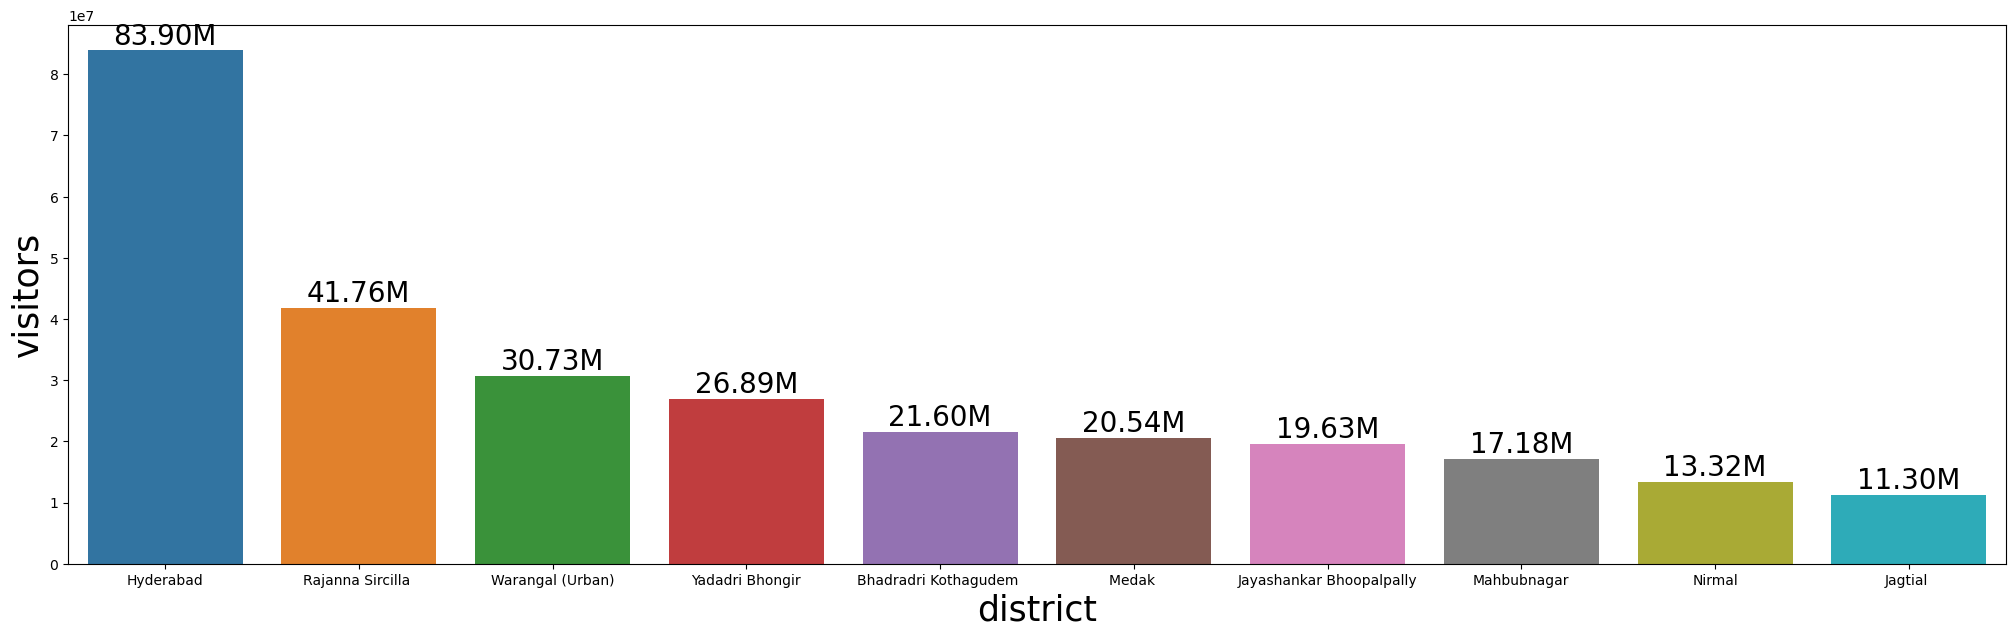

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
plt.figure(figsize=(25, 7))

# Set the axis labels with appropriate font sizes
plt.xlabel('District', fontsize=25)
plt.ylabel('Visitors', fontsize=25)

# Create the bar plot
barplot1 = sns.barplot(x='district', y='visitors', data=Top_10_domestic)

# Add data labels to each bar
for bar in barplot1.patches:
    # Get the height of the bar
    height = bar.get_height()
    
    # Set the label text
    label = f'{height / 1000000:.2f}M'
    
    # Add the label text above the bar
    barplot1.text(
        bar.get_x() + bar.get_width() / 2.0,  # X position: Center of the bar
        height + 50000,  # Y position: Just above the bar
        label,  # Text to display
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        color='black',  # Color of the text for better visibility
        fontsize=20  # Font size
    )

# Show the plot
plt.show()


# 2.  List down the top 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?

# cagr Formula = ((final_value/initial_value)**(1/n)-1)*100

# final_value = end_year
# initial_value = start_year
# n = no of years

In [28]:
cagr_group_domestic = domestic_visitors.groupby(['year','district'])['visitors'].sum().reset_index()
cagr_group_domestic

,year,district,visitors
0,2016,Adilabad,5075557
1,2016,Bhadradri Kothagudem,889030
2,2016,Hyderabad,23394705
3,2016,Jagtial,623077
4,2016,Jangaon,40660
...,...,...,...
121,2019,Vikarabad,0
122,2019,Wanaparthy,298639
123,2019,Warangal (Rural),353500
124,2019,Warangal (Urban),1795230


In [29]:
pivot_domestic = cagr_group_domestic.pivot(index = 'district' , columns = 'year' , values = 'visitors')
pivot_domestic

year,2016,2017,2018,2019
district,,,,
Adilabad,5075557.0,825380.0,644743.0,775895.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23394705.0,27160242.0,19543651.0,13802362.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40660.0,165708.0,291022.0,328890.0
Jayashankar Bhoopalpally,243400.0,1831010.0,16895925.0,662530.0
Jogulamba Gadwal,523401.0,2245399.0,2036545.0,2007995.0
Kamareddy,127.0,540.0,572.0,534.0
Karimnagar,9167468.0,123976.0,93448.0,77491.0


In [35]:
pivot_domestic_ = pivot_domestic[pivot_domestic[2016] != 0]
pivot_domestic_ 

year,2016,2017,2018,2019
district,,,,
Adilabad,5075557.0,825380.0,644743.0,775895.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23394705.0,27160242.0,19543651.0,13802362.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40660.0,165708.0,291022.0,328890.0
Jayashankar Bhoopalpally,243400.0,1831010.0,16895925.0,662530.0
Jogulamba Gadwal,523401.0,2245399.0,2036545.0,2007995.0
Kamareddy,127.0,540.0,572.0,534.0
Karimnagar,9167468.0,123976.0,93448.0,77491.0


In [37]:
pivot_domestic_['CAGR'] = ((pivot_domestic_[2019]/pivot_domestic_[2016])**(1/4)-1)*100
pivot_domestic_

year,2016,2017,2018,2019,CAGR
district,,,,,
Adilabad,5075557.0,825380.0,644743.0,775895.0,-37.471241
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0,94.860465
Hyderabad,23394705.0,27160242.0,19543651.0,13802362.0,-12.358670
Jagtial,623077.0,3641401.0,3952921.0,3086115.0,49.182402
Jangaon,40660.0,165708.0,291022.0,328890.0,68.643972
Jayashankar Bhoopalpally,243400.0,1831010.0,16895925.0,662530.0,28.446195
Jogulamba Gadwal,523401.0,2245399.0,2036545.0,2007995.0,39.952938
Kamareddy,127.0,540.0,572.0,534.0,43.197153
Karimnagar,9167468.0,123976.0,93448.0,77491.0,-69.678515


In [38]:
Top_3_districts_domestic = pivot_domestic_.sort_values('CAGR',ascending = False)
Top_3_districts_domestic.head(3)

year,2016,2017,2018,2019,CAGR
district,,,,,
Mancherial,7802.0,191626.0,398004.0,269810.0,142.500715
Warangal (Rural),19400.0,144250.0,302012.0,353500.0,106.607899
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0,94.860465


In [43]:
cagr_group_foreign = foreign_visitors.groupby(['year','district'])['visitors'].sum().reset_index()
cagr_group_foreign

,year,district,visitors
0,2016,Adilabad,10
1,2016,Bhadradri Kothagudem,0
2,2016,Hyderabad,163631
3,2016,Jagtial,0
4,2016,Jangaon,2
...,...,...,...
121,2019,Vikarabad,0
122,2019,Wanaparthy,0
123,2019,Warangal (Rural),0
124,2019,Warangal (Urban),2450


In [44]:
pivot_foreign = cagr_group_foreign.pivot(index = 'district' , columns = 'year' , values = 'visitors')
pivot_foreign

year,2016,2017,2018,2019
district,,,,
Adilabad,10.0,11.0,5.0,6.0
Bhadradri Kothagudem,0.0,0.0,0.0,0.0
Hyderabad,163631.0,247179.0,314788.0,319300.0
Jagtial,0.0,0.0,0.0,0.0
Jangaon,2.0,0.0,0.0,0.0
Jayashankar Bhoopalpally,86.0,582.0,539.0,45.0
Jogulamba Gadwal,45.0,305.0,300.0,295.0
Kamareddy,0.0,0.0,0.0,0.0
Karimnagar,0.0,0.0,0.0,0.0


In [45]:
pivot_foreign_ = pivot_foreign[pivot_foreign[2016] != 0]
pivot_foreign

year,2016,2017,2018,2019
district,,,,
Adilabad,10.0,11.0,5.0,6.0
Bhadradri Kothagudem,0.0,0.0,0.0,0.0
Hyderabad,163631.0,247179.0,314788.0,319300.0
Jagtial,0.0,0.0,0.0,0.0
Jangaon,2.0,0.0,0.0,0.0
Jayashankar Bhoopalpally,86.0,582.0,539.0,45.0
Jogulamba Gadwal,45.0,305.0,300.0,295.0
Kamareddy,0.0,0.0,0.0,0.0
Karimnagar,0.0,0.0,0.0,0.0


In [46]:
pivot_foreign_['CAGR'] = (((pivot_foreign_[2019]/pivot_foreign_[2016]) ** (1/4))-1)*100
pivot_foreign_

year,2016,2017,2018,2019,CAGR
district,,,,,
Adilabad,10.0,11.0,5.0,6.0,-11.988826
Hyderabad,163631.0,247179.0,314788.0,319300.0,18.190708
Jangaon,2.0,0.0,0.0,0.0,-100.000000
Jayashankar Bhoopalpally,86.0,582.0,539.0,45.0,-14.949178
Jogulamba Gadwal,45.0,305.0,300.0,295.0,60.011934
Mahbubnagar,868.0,520.0,454.0,440.0,-15.621221
Mulugu,NaN,NaN,NaN,575.0,NaN
Nagarkurnool,29.0,311.0,222.0,199.0,61.850397
Narayanpet,NaN,NaN,NaN,5.0,NaN


In [47]:
Top_3_districts_foreign = pivot_foreign_.sort_values('CAGR',ascending = False)
Top_3_districts_foreign.head(3)

year,2016,2017,2018,2019,CAGR
district,,,,,
Nagarkurnool,29.0,311.0,222.0,199.0,61.850397
Jogulamba Gadwal,45.0,305.0,300.0,295.0,60.011934
Hyderabad,163631.0,247179.0,314788.0,319300.0,18.190708


# 3.List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)

In [49]:
Top_3_districts_domestic = pivot_domestic_.sort_values('CAGR',ascending = True)
Top_3_districts_domestic.head(3)

year,2016,2017,2018,2019,CAGR
district,,,,,
Karimnagar,9167468.0,123976.0,93448.0,77491.0,-69.678515
Nalgonda,5858461.0,241916.0,160638.0,140918.0,-60.618185
Warangal (Urban),25788035.0,1420002.0,1723336.0,1795230.0,-48.634034


In [50]:
Top_3_districts_foreign = pivot_foreign_.sort_values('CAGR',ascending = True)
Top_3_districts_foreign.head(3)

year,2016,2017,2018,2019,CAGR
district,,,,,
Jangaon,2.0,0.0,0.0,0.0,-100.000000
Mahbubnagar,868.0,520.0,454.0,440.0,-15.621221
Jayashankar Bhoopalpally,86.0,582.0,539.0,45.0,-14.949178


# 4.What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?

In [51]:
domestic_hyderabad = domestic_visitors[domestic_visitors['district'] == 'Hyderabad']
domestic_hyderabad

,district,date,month,year,visitors
24,Hyderabad,2016-01-01,January,2016,1122510
25,Hyderabad,2016-01-02,February,2016,778748
26,Hyderabad,2016-01-03,March,2016,1017794
27,Hyderabad,2016-01-04,April,2016,1127738
28,Hyderabad,2016-01-05,May,2016,1287181
29,Hyderabad,2016-01-06,June,2016,12032661
30,Hyderabad,2016-01-07,July,2016,1096754
31,Hyderabad,2016-01-08,August,2016,1061137
32,Hyderabad,2016-01-09,September,2016,832987
33,Hyderabad,2016-01-10,October,2016,901960


In [52]:
domestic_month = domestic_hyderabad.groupby('month')['visitors'].sum()
domestic_month

month
April         6126839
August        5750967
December      9338637
February      5014430
January       6452101
July          5552527
June         16897783
March         5227626
May           6049214
November      5626156
October       6552397
September     5312283
Name: visitors, dtype: int32

In [53]:
import numpy as np
monthly_data_domestic_visitors = domestic_hyderabad.groupby('month')['visitors'].sum().reset_index()
total = monthly_data_domestic_visitors['visitors'].sum()
monthly_data_domestic_visitors['percentage%'] = np.round((monthly_data_domestic_visitors['visitors']/total)*100,2)
monthly_data_domestic_visitors = monthly_data_domestic_visitors.sort_values('percentage%',ascending = False)
monthly_data_domestic_visitors

,month,visitors,percentage%
6,June,16897783,20.14
2,December,9338637,11.13
10,October,6552397,7.81
4,January,6452101,7.69
0,April,6126839,7.30
8,May,6049214,7.21
1,August,5750967,6.85
9,November,5626156,6.71
5,July,5552527,6.62
11,September,5312283,6.33


In [54]:
# foreign_visitors

In [55]:
foreign_hyderabad = foreign_visitors[foreign_visitors['district'] == 'Hyderabad']
foreign_hyderabad

,district,date,month,year,visitors
24,Hyderabad,2016-01-01,January,2016,15865
25,Hyderabad,2016-01-02,February,2016,29646
26,Hyderabad,2016-01-03,March,2016,13019
27,Hyderabad,2016-01-04,April,2016,8402
28,Hyderabad,2016-01-05,May,2016,8522
29,Hyderabad,2016-01-06,June,2016,10284
30,Hyderabad,2016-01-07,July,2016,17142
31,Hyderabad,2016-01-08,August,2016,12842
32,Hyderabad,2016-01-09,September,2016,9397
33,Hyderabad,2016-01-10,October,2016,12808


In [56]:
monthly_data_foreign_visitors = foreign_hyderabad.groupby('month')['visitors'].sum().reset_index()
total = monthly_data_foreign_visitors['visitors'].sum()
monthly_data_foreign_visitors['percentage%'] = np.round((monthly_data_foreign_visitors['visitors']/total)*100,2)
monthly_data_foreign_visitors = monthly_data_foreign_visitors.sort_values('percentage%',ascending = False)
monthly_data_foreign_visitors

,month,visitors,percentage%
2,December,119995,11.48
4,January,106450,10.19
3,February,103778,9.93
10,October,97954,9.37
11,September,94080,9.00
9,November,93503,8.95
1,August,83769,8.02
5,July,80616,7.72
7,March,76358,7.31
6,June,67524,6.46


In [57]:
monthly_data_foreign_visitors
monthly_data_domestic_visitors

,month,visitors,percentage%
6,June,16897783,20.14
2,December,9338637,11.13
10,October,6552397,7.81
4,January,6452101,7.69
0,April,6126839,7.30
8,May,6049214,7.21
1,August,5750967,6.85
9,November,5626156,6.71
5,July,5552527,6.62
11,September,5312283,6.33


In [58]:
#visualization

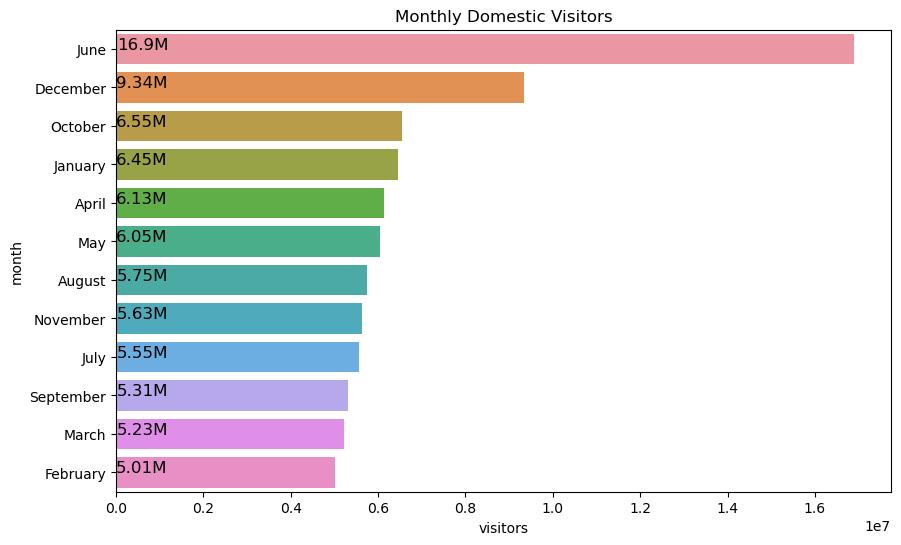

In [59]:
plt.figure(figsize=(10, 6))
domestic = sns.barplot(x=monthly_data_domestic_visitors['visitors'], y=monthly_data_domestic_visitors['month'], data=monthly_data_domestic_visitors)

# Set plot title
plt.title('Monthly Domestic Visitors')

# data_labels
new_data = monthly_data_domestic_visitors['visitors'].values / 1000  # Convert to thousands
for i, v in enumerate(new_data):
    domestic.text(v + 0.9, i, str(round(monthly_data_domestic_visitors['visitors'].values[i] / 1000000, 2)) + 'M', color='black', fontsize=12)

# Show plot
plt.show()

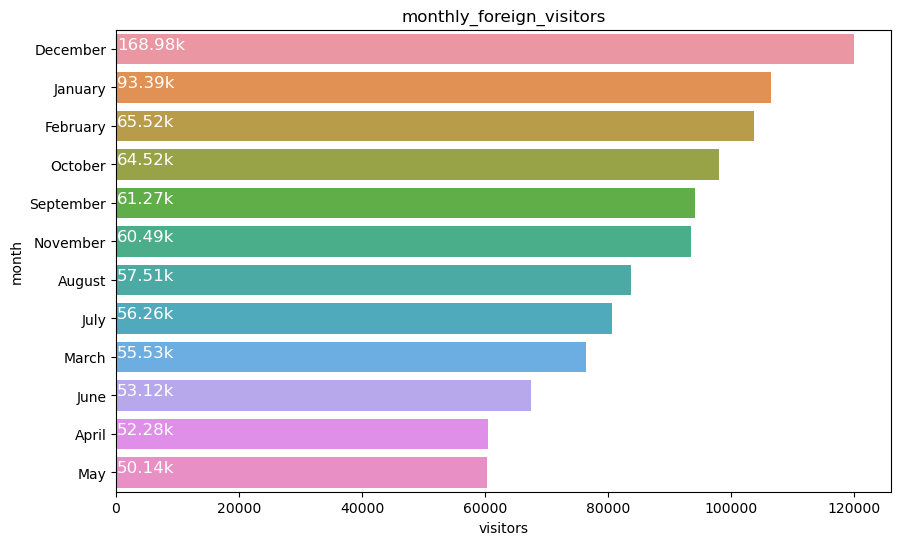

In [60]:
plt.figure(figsize=(10, 6))

foreign = sns.barplot(x = monthly_data_foreign_visitors['visitors'] , y = monthly_data_foreign_visitors['month'],data = monthly_data_foreign_visitors)

# add plot title
plt.title('monthly_foreign_visitors')
new_data = monthly_data_foreign_visitors['visitors'].values/1000

# add data_labels
for i, v in enumerate(new_data):
    foreign.text(v + 0.2, i, str(round(monthly_data_domestic_visitors['visitors'].values[i]/100000, 2))+'k', color='white', fontsize=12)
plt.show()

# 5.Show the top & bottom 3 districts with high domestic to foreign tourist ratio?

In [61]:
domestic_visitors_ratio = domestic_visitors[['visitors','district']]
foreign_visitors_ratio = foreign_visitors[['district','visitors']]

In [62]:
group_domestic_ratio = domestic_visitors_ratio.groupby('district')['visitors'].sum().reset_index()
group_foreign_ratio = foreign_visitors_ratio.groupby('district')['visitors'].sum().reset_index()
join_data = pd.merge(group_domestic_ratio , group_foreign_ratio , on = 'district')
join_data['ratio'] = (join_data['visitors_x']/join_data['visitors_y'])
join_data

,district,visitors_x,visitors_y,ratio
0,Adilabad,7321575,32,2.287992e+05
1,Bhadradri Kothagudem,21600962,0,inf
2,Hyderabad,83900960,1044898,8.029584e+01
3,Jagtial,11303514,0,inf
4,Jangaon,826280,2,4.131400e+05
5,Jayashankar Bhoopalpally,19632865,1252,1.568120e+04
6,Jogulamba Gadwal,6813340,945,7.209884e+03
7,Kamareddy,1773,0,inf
8,Karimnagar,9462383,0,inf
9,Khammam,9378315,0,inf


In [63]:
print('Top 3 foreign and domestic ratio')
Top_3_districts_ratio = join_data[join_data['visitors_y'] != 0].sort_values('ratio',ascending = False).head(3)
Top_3_districts_ratio 

Top 3 foreign and domestic ratio


,district,visitors_x,visitors_y,ratio
19,Nirmal,13315796,2,6.657898e+06
4,Jangaon,826280,2,4.131400e+05
0,Adilabad,7321575,32,2.287992e+05


In [64]:
print('Bottom 3 foreign and domestic ratio')
Bottom_3_district_ratio = join_data[join_data['visitors_y'] != 0].sort_values('ratio',ascending = True).head(3)
Bottom_3_district_ratio

Bottom 3 foreign and domestic ratio


,district,visitors_x,visitors_y,ratio
2,Hyderabad,83900960,1044898,80.295837
29,Warangal (Rural),819162,306,2677.000000
16,Mulugu,1819800,575,3164.869565


<Axes: title={'center': 'Top 3 district ratio of  domestic and foreign visitors'}, xlabel='ratio', ylabel='district'>

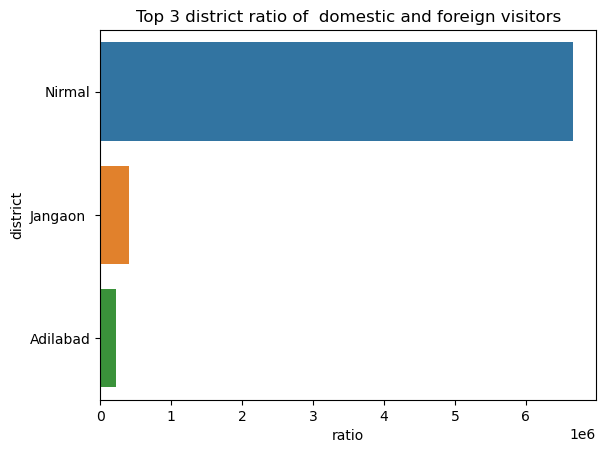

In [65]:
#visualization
plt.title('Top 3 district ratio of  domestic and foreign visitors')
sns.barplot(x = 'ratio' , y = 'district', data = Top_3_districts_ratio )

<Axes: title={'center': 'Bottom 3 district ratio of  domestic and foreign visitors'}, xlabel='ratio', ylabel='district'>

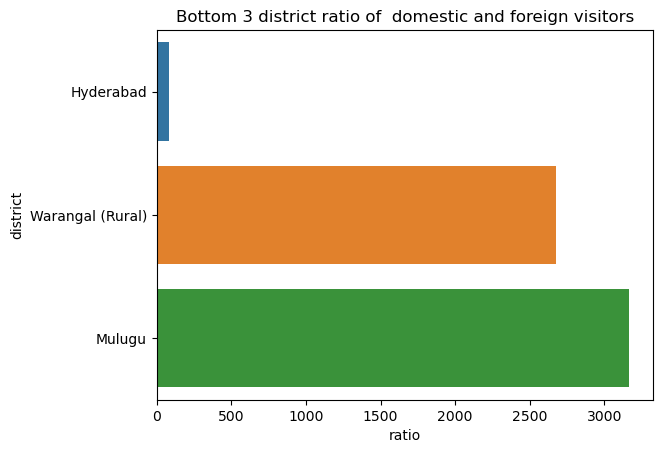

In [66]:
plt.title('Bottom 3 district ratio of  domestic and foreign visitors')
sns.barplot(x = 'ratio' , y = 'district', data = Bottom_3_district_ratio )

# 6.List the top & bottom 5 districts based on 'population to tourist footfall ratio*' ratio in 2019? ( * ratio: Total Visitors / Total Residents Population in the given year)

In [67]:
# import datasets
telangana_data = pd.read_excel('Telangana_population.xlsx')
telangana_data

,S.No.,District Name,As per 2011 census,Estimated Population in 2024
0,1,Adilabad,708972,768667
1,2,Bhadradri Kothagudem,1069261,1159293
2,3,Hyderabad,3943323,4275351
3,4,Jagitial,985417,1068389
4,5,Jangaon,566376,614065
5,6,Jayashankar Bhupalpally,416763,451854
6,7,Jogulamba Gadwal,609990,661351
7,8,Kamareddy,972625,1054520
8,9,Karimnagar,1005711,1090392
9,10,Khammam,1401639,1519657


In [68]:
data_2019 =  domestic_visitors[(domestic_visitors['year'] == 2019)]
data_2019

,district,date,month,year,visitors
1116,Adilabad,2019-01-01,January,2019,25071
1117,Adilabad,2019-01-02,February,2019,406177
1118,Adilabad,2019-01-03,March,2019,14347
1119,Adilabad,2019-01-04,April,2019,9972
1120,Adilabad,2019-01-05,May,2019,6997
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,389010
1508,Yadadri Bhongir,2019-01-09,September,2019,366862
1509,Yadadri Bhongir,2019-01-10,October,2019,381860
1510,Yadadri Bhongir,2019-01-11,November,2019,365990


In [69]:
group_data_2019 = data_2019.groupby(['district','year'])['visitors'].sum().reset_index()
group_data_2019

,district,year,visitors
0,Adilabad,2019,775895
1,Bhadradri Kothagudem,2019,12817737
2,Hyderabad,2019,13802362
3,Jagtial,2019,3086115
4,Jangaon,2019,328890
5,Jayashankar Bhoopalpally,2019,662530
6,Jogulamba Gadwal,2019,2007995
7,Kamareddy,2019,534
8,Karimnagar,2019,77491
9,Khammam,2019,1413440


In [70]:
concat_data = pd.concat([group_data_2019,telangana_data['As per 2011 census']],axis = 1)
concat_data

,district,year,visitors,As per 2011 census
0,Adilabad,2019,775895,708972
1,Bhadradri Kothagudem,2019,12817737,1069261
2,Hyderabad,2019,13802362,3943323
3,Jagtial,2019,3086115,985417
4,Jangaon,2019,328890,566376
5,Jayashankar Bhoopalpally,2019,662530,416763
6,Jogulamba Gadwal,2019,2007995,609990
7,Kamareddy,2019,534,972625
8,Karimnagar,2019,77491,1005711
9,Khammam,2019,1413440,1401639


In [71]:
concat_data['tourist_footfall_ratio'] = np.round((concat_data['visitors']/concat_data['As per 2011 census']),4)
Top_5_footfall_ratio = concat_data.sort_values('tourist_footfall_ratio',ascending = False)
new_data = Top_5_footfall_ratio[Top_5_footfall_ratio['visitors'] !=0] 
new_data

,district,year,visitors,As per 2011 census,tourist_footfall_ratio
23,Rajanna Sircilla,2019,16832897,552037,30.4923
1,Bhadradri Kothagudem,2019,12817737,1069261,11.9875
14,Medak,2019,5452570,767428,7.1050
16,Mulugu,2019,1819800,257744,7.0605
32,Yadadri Bhongir,2019,4489374,739448,6.0713
20,Nirmal,2019,3816778,709418,5.3802
2,Hyderabad,2019,13802362,3943323,3.5002
6,Jogulamba Gadwal,2019,2007995,609990,3.2918
3,Jagtial,2019,3086115,985417,3.1318
25,Sangareddy,2019,4553160,1527628,2.9805


In [72]:
Top_5 = new_data.head(5)
Top_5

,district,year,visitors,As per 2011 census,tourist_footfall_ratio
23,Rajanna Sircilla,2019,16832897,552037,30.4923
1,Bhadradri Kothagudem,2019,12817737,1069261,11.9875
14,Medak,2019,5452570,767428,7.1050
16,Mulugu,2019,1819800,257744,7.0605
32,Yadadri Bhongir,2019,4489374,739448,6.0713


In [73]:
Bottom_5 = new_data.tail(5)
Bottom_5

,district,year,visitors,As per 2011 census,tourist_footfall_ratio
8,Karimnagar,2019,77491,1005711,0.0771
10,Komaram Bheem Asifabad,2019,19189,515812,0.0372
21,Nizamabad,2019,46333,1571022,0.0295
22,Peddapalli,2019,16581,795332,0.0208
7,Kamareddy,2019,534,972625,0.0005


<Axes: title={'center': 'Top 5 districts footfall Ratio of 2019'}, xlabel='district', ylabel='tourist_footfall_ratio'>

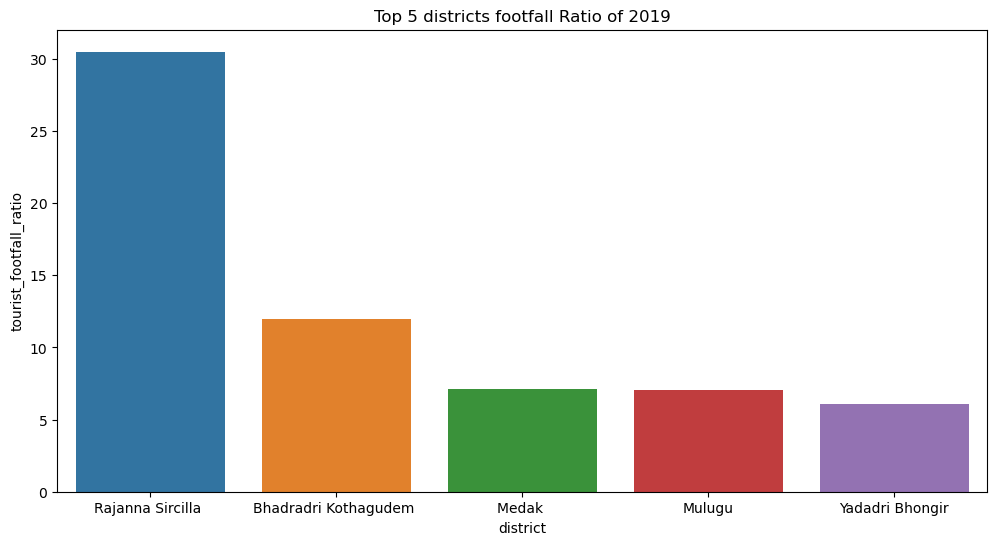

In [74]:
# visualization 
plt.figure(figsize = (12,6))
plt.title('Top 5 districts footfall Ratio of 2019')
sns.barplot(x = 'district',y = 'tourist_footfall_ratio' , data = Top_5)


<Axes: title={'center': 'Bottom 5 districts footfall Ratio of 2019'}, xlabel='district', ylabel='tourist_footfall_ratio'>

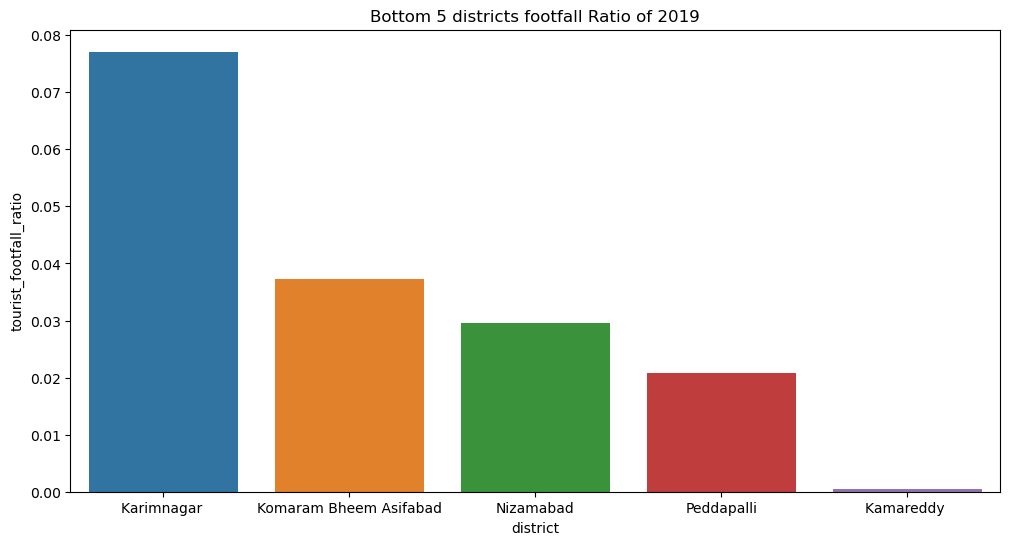

In [75]:
plt.figure(figsize = (12,6))
plt.title('Bottom 5 districts footfall Ratio of 2019')
sns.barplot(x = 'district',y = 'tourist_footfall_ratio' , data = Bottom_5)

# 7.What will be the projected number of domestic and foreign tourists in Hyderabad in 2025 based on the growth rate from previous years?